Accuracy: [0.9622641509433962, 0.9622641509433962, 0.9433962264150944, 0.9433962264150944, 0.9622641509433962, 0.9622641509433962, 0.9622641509433962, 0.9622641509433962, 0.9622641509433962, 0.9622641509433962, 0.9622641509433962, 0.9433962264150944, 0.9433962264150944, 0.9433962264150944, 0.9433962264150944, 0.9622641509433962, 0.9622641509433962, 0.9622641509433962, 0.9622641509433962, 0.9622641509433962]
Error: [0.03773584905660377, 0.03773584905660377, 0.05660377358490566, 0.05660377358490566, 0.03773584905660377, 0.03773584905660377, 0.03773584905660377, 0.03773584905660377, 0.03773584905660377, 0.03773584905660377, 0.03773584905660377, 0.05660377358490566, 0.05660377358490566, 0.05660377358490566, 0.05660377358490566, 0.03773584905660377, 0.03773584905660377, 0.03773584905660377, 0.03773584905660377, 0.03773584905660377]


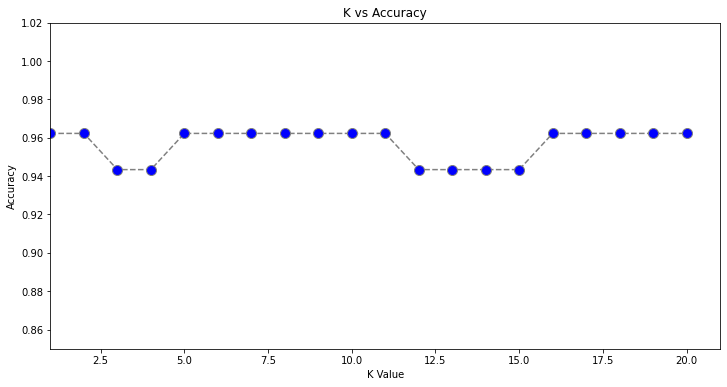

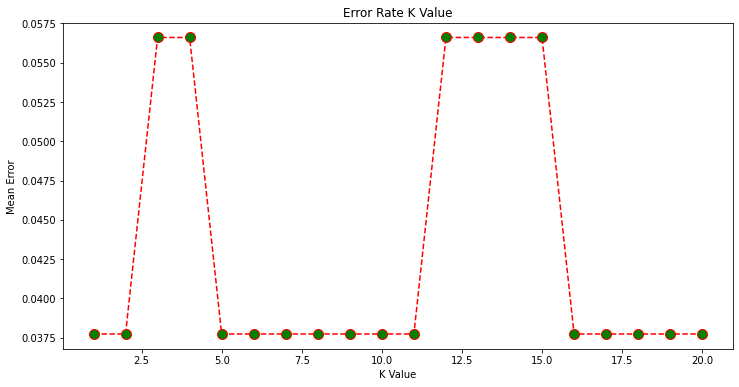

In [2]:
# Import Libraries needed
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Code to assign url linl to access data file from
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

# Assign X as Features, Y - as Flower Class
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

# Split entire data set into training and test samples, where test size is taken as 35% of entire data frame.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

# Preprocssing of data, 
# Scaling of raw data to Normalize and avoid impact of broad range of distance between points
    # to not skew overall result
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Calculate similarities between data points to get K neighbors by using Scikit lern function
    # of Kneighborclassifier and then calculate mean accuracy and error rate of prediction 
        # by looping each K value for 5 times in range of k value  between 1 to 20 
acc_score = []
error = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
for k in range(1,21):
    for i in range(5):
        classifier = KNeighborsClassifier(n_neighbors=k)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        
    acc_score.append(np.mean(accuracy_score (y_test, y_pred)))
    error.append(np.mean(y_pred!=y_test))

# Plot line diagram  using matplotlib function for the mean accuracy of predictions made above on test data
    # with accuracy % on Y axis and K value on X axis.
plt.figure(figsize=(12, 6))
plt.plot(range(1,21), acc_score,color='gray',linestyle = '--',marker='o',markerfacecolor='blue',markersize=10)
plt.xlim(1,21)
plt.ylim(0.85,1.02)
plt.title('K vs Accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

# Plot line diagram  using matplotlib function for the mean error in predictions made above on test data
    # with error % on Y axis and K value on X axis.
plt.figure(figsize=(12,6))
plt.plot(range(1,21),error, color ='red', linestyle = 'dashed', marker ='o',
         markerfacecolor = 'green', markersize = 10)
plt.title ('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
    
# Print values of Accuracy and Error predictions.
print("Accuracy:", acc_score)
print("Error:",error)